In [14]:
from helpers import *
import custom_cutout_aug
import detection.transforms as T
from custom_cutout_aug import *

In [15]:
def get_transform(train):
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [16]:
# our dataset has two classes only - background and person
num_classes = 2
# use our dataset and defined transformations
dataset = PennFudanDataset('PennFudanPed', get_transform(train=True))
dataset_test = PennFudanDataset('PennFudanPed', get_transform(train=False))

In [17]:
index = 0

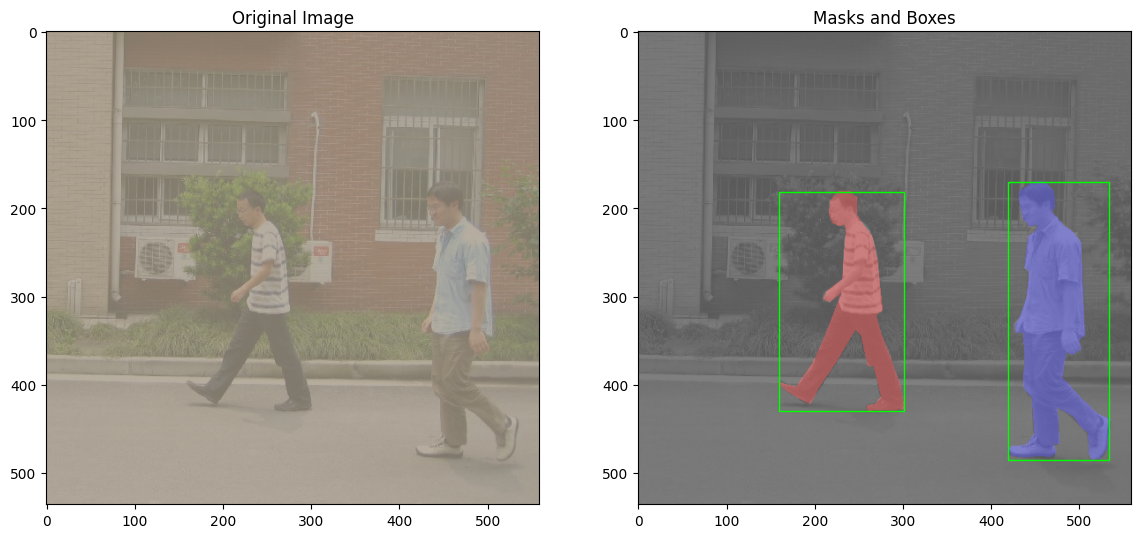

In [18]:
visualize_sample(dataset_test, index, enhance=None, model=None)

In [19]:
cutout = CustomCutOut_TensorImages(num_holes=20,
                                    min_cutout_size=30,
                                    max_cutout_size=60,
                                    bbox_removal_threshold=0.30,
                                    fill_value=[102/255, 205/255, 0], #torch.Tensor([0, 1, 0]),
                                    always_apply=False,
                                    p=0.5)

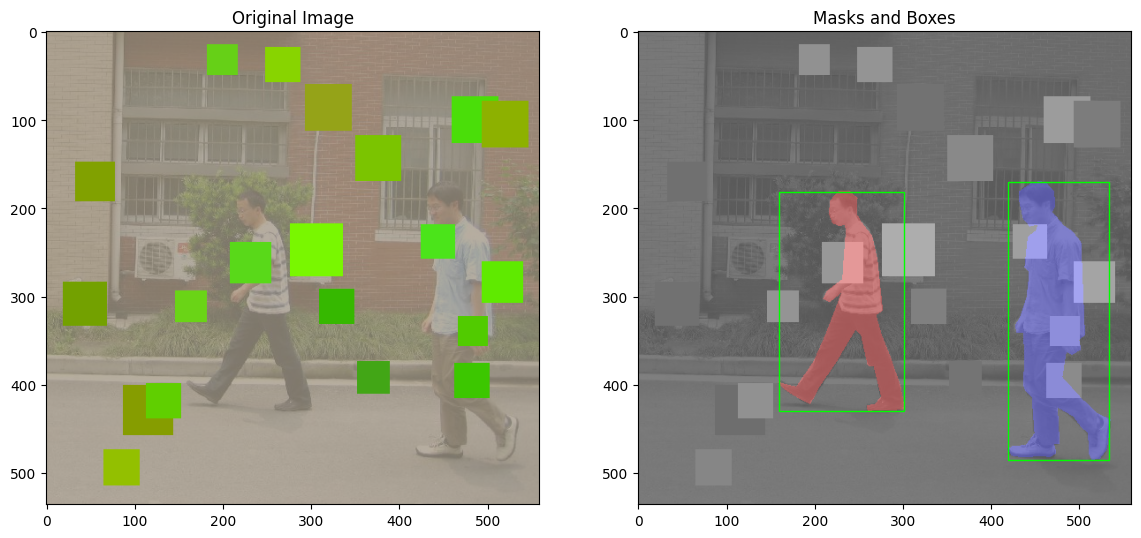

In [20]:
img, targets = dataset_test[index]
img_cutout, targets_cutout = cutout.apply(img, targets)
visualize_coutout_sample(img_cutout, targets, enhance=None, model=None)